## A deeper look into Covid in Portugal

We are interested in analysing Covid data in portugal, understand the evolution of confirmed and active cases, as well as deaths, vaccinations, and much more. To do that we are going to use the data from this [github repository](https://github.com/dssg-pt/covid19pt-data), that collects _all_ of the data covid-wise in Portugal.


![Image of meme](https://static.thehoneycombers.com/wp-content/uploads/sites/4/2020/03/Best-funny-Coronavirus-memes-2020-Honeycombers-Bali-6.jpg)


First lets take a quick glance at the data.

### Preliminaries

We are going to use Python and one of its most known libraries, [pandas](https://pandas.pydata.org/), to explore and analyse this Covid data.

1. Python is a programming language, i.e you can do pretty much whatever with it. (Data Science, Games, Web and Mobile apps)
2. This is a jupyter notebook (one of the more typical ways to explore data)
3. Pandas is a python library that is composed by DataFrames (tables) which in turn are composed of Series (one dimensional arrays)


### Initial Setup

Here we are importing libraries (code made by someone else) to agilize our exploration.

In [1]:
import pandas as pd #Pandas
import matplotlib.pyplot as plt #Help us to create plots.

### DataFrame Example
Lets just go through some basics first

In [2]:
pd.DataFrame([1,2,3,4,5])

,0
0,1
1,2
2,3
3,4
4,5


In [3]:
data = {"A":[1,2,3,4,5]}
pd.DataFrame(data)

,A
0,1
1,2
2,3
3,4
4,5


In [4]:
values =["Bill Gates","Jeff Bezos"]
index = ["Microsoft","Amazon"]
pd.DataFrame(index = index, data = {"Founders":values})

,Founders
Microsoft,Bill Gates
Amazon,Jeff Bezos


In [6]:
pd.Series(index=index,data=values)
#pd.Series(outra coisa qualquer, separar 1 e ultimo nome..) + juntar num dataframe. magic

Microsoft    Bill Gates
Amazon       Jeff Bezos
dtype: object

## Now that we are experts at DataFraming, lets now jump straight at exploring covid data

First things first, we need to import the data from the github repository. They have several files, but for now we are only going to get **"data.csv"**

In [7]:
covid_data = 'https://raw.githubusercontent.com/dssg-pt/covid19pt-data/master/data.csv'
df = pd.read_csv(covid_data) #remove
df #remove

,data,data_dados,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,...,obitos_m,confirmados_desconhecidos_m,confirmados_desconhecidos_f,ativos,internados_enfermaria,confirmados_desconhecidos,incidencia_nacional,incidencia_continente,rt_nacional,rt_continente
0,26-02-2020,26-02-2020 00:00,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27-02-2020,27-02-2020 00:00,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28-02-2020,28-02-2020 00:00,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29-02-2020,29-02-2020 00:00,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-03-2020,01-03-2020 00:00,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,13-06-2021,13-06-2021 00:00,857447,342340,120489,326011,30428,22619,5774,9786,...,8952.0,NaN,NaN,25058.0,243.0,400.0,79.3,78.4,1.07,1.08
474,14-06-2021,14-06-2021 00:00,858072,342464,120517,326412,30438,22653,5799,9789,...,8952.0,NaN,NaN,25403.0,263.0,407.0,84.5,83.4,1.09,1.10
475,15-06-2021,15-06-2021 00:00,859045,342611,120606,327041,30470,22689,5827,9801,...,8954.0,NaN,NaN,25493.0,267.0,406.0,84.5,83.4,1.09,1.10
476,16-06-2021,16-06-2021 00:00,860395,342810,120691,327969,30500,22779,5843,9803,...,8956.0,NaN,NaN,26248.0,268.0,399.0,91.0,90.5,1.12,1.13


Now that we have the data, lets just explore it. 

In [8]:
df.head() #remove

,data,data_dados,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,...,obitos_m,confirmados_desconhecidos_m,confirmados_desconhecidos_f,ativos,internados_enfermaria,confirmados_desconhecidos,incidencia_nacional,incidencia_continente,rt_nacional,rt_continente
0,26-02-2020,26-02-2020 00:00,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27-02-2020,27-02-2020 00:00,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28-02-2020,28-02-2020 00:00,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29-02-2020,29-02-2020 00:00,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-03-2020,01-03-2020 00:00,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.tail() #remove

,data,data_dados,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,...,obitos_m,confirmados_desconhecidos_m,confirmados_desconhecidos_f,ativos,internados_enfermaria,confirmados_desconhecidos,incidencia_nacional,incidencia_continente,rt_nacional,rt_continente
473,13-06-2021,13-06-2021 00:00,857447,342340,120489,326011,30428,22619,5774,9786,...,8952.0,NaN,NaN,25058.0,243.0,400.0,79.3,78.4,1.07,1.08
474,14-06-2021,14-06-2021 00:00,858072,342464,120517,326412,30438,22653,5799,9789,...,8952.0,NaN,NaN,25403.0,263.0,407.0,84.5,83.4,1.09,1.10
475,15-06-2021,15-06-2021 00:00,859045,342611,120606,327041,30470,22689,5827,9801,...,8954.0,NaN,NaN,25493.0,267.0,406.0,84.5,83.4,1.09,1.10
476,16-06-2021,16-06-2021 00:00,860395,342810,120691,327969,30500,22779,5843,9803,...,8956.0,NaN,NaN,26248.0,268.0,399.0,91.0,90.5,1.12,1.13
477,17-06-2021,17-06-2021 00:00,861628,343006,120772,328773,30547,22852,5863,9815,...,8956.0,NaN,NaN,26817.0,276.0,403.0,91.0,90.5,1.12,1.13


In [10]:
df.columns #remove

Index(['data', 'data_dados', 'confirmados', 'confirmados_arsnorte',
       'confirmados_arscentro', 'confirmados_arslvt',
       'confirmados_arsalentejo', 'confirmados_arsalgarve',
       'confirmados_acores', 'confirmados_madeira', 'confirmados_estrangeiro',
       'confirmados_novos', 'recuperados', 'obitos', 'internados',
       'internados_uci', 'lab', 'suspeitos', 'vigilancia', 'n_confirmados',
       'cadeias_transmissao', 'transmissao_importada', 'confirmados_0_9_f',
       'confirmados_0_9_m', 'confirmados_10_19_f', 'confirmados_10_19_m',
       'confirmados_20_29_f', 'confirmados_20_29_m', 'confirmados_30_39_f',
       'confirmados_30_39_m', 'confirmados_40_49_f', 'confirmados_40_49_m',
       'confirmados_50_59_f', 'confirmados_50_59_m', 'confirmados_60_69_f',
       'confirmados_60_69_m', 'confirmados_70_79_f', 'confirmados_70_79_m',
       'confirmados_80_plus_f', 'confirmados_80_plus_m', 'sintomas_tosse',
       'sintomas_febre', 'sintomas_dificuldade_respiratoria',
     

What about doing a quick visualization of 'confirmados' and 'activos' ? 

Hmm, idk that looks difficult.

In [11]:
df["confirmados_novos"]#remove

0         0
1         0
2         0
3         0
4         0
       ... 
473     707
474     625
475     973
476    1350
477    1233
Name: confirmados_novos, Length: 478, dtype: int64

In [12]:
df["ativos"] #remove

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
        ...   
473    25058.0
474    25403.0
475    25493.0
476    26248.0
477    26817.0
Name: ativos, Length: 478, dtype: float64

There must be a better way to look at the data... LOOK FOR MEMES

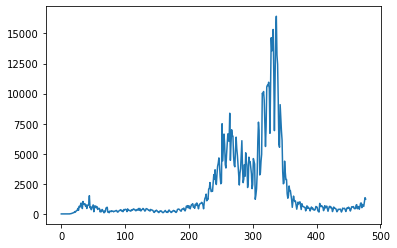

In [13]:
df["confirmados_novos"].plot() #remove..

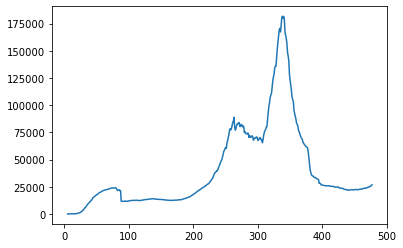

In [14]:
df["ativos"].plot() #remove..

### Attention check
Something is wrong...

The x axis should be dates right? What's going on? Lets look at the data again

In [15]:
df.head()

,data,data_dados,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,...,obitos_m,confirmados_desconhecidos_m,confirmados_desconhecidos_f,ativos,internados_enfermaria,confirmados_desconhecidos,incidencia_nacional,incidencia_continente,rt_nacional,rt_continente
0,26-02-2020,26-02-2020 00:00,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27-02-2020,27-02-2020 00:00,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28-02-2020,28-02-2020 00:00,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29-02-2020,29-02-2020 00:00,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-03-2020,01-03-2020 00:00,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The x axis should be 'data' or 'data_dados' right? However, in the plot the x are just numeric values starting in 0 going hover 400. Can you figure out why ?

In [16]:
date_parser = lambda date_str: pd.to_datetime(date_str,format='%d-%m-%Y')

In [17]:
#df = pd.read_csv(covid_data)
#NEW index_col = 0 + date_parser...

In [18]:
df = pd.read_csv(covid_data,index_col=0,date_parser=date_parser)

### New syntax alert! 
*lambda* is used to define functions as an alternative to the _def_ keyword

In [19]:
#alternative way, more 'common' way
def date_parser(date_str):
    return pd.to_datetime(date_str,format='%d-%m-%Y')

In [20]:
df

,data_dados,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,confirmados_estrangeiro,...,obitos_m,confirmados_desconhecidos_m,confirmados_desconhecidos_f,ativos,internados_enfermaria,confirmados_desconhecidos,incidencia_nacional,incidencia_continente,rt_nacional,rt_continente
data,,,,,,,,,,,,,,,,,,,,,
2020-02-26,26-02-2020 00:00,0,0,0,0,0,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-27,27-02-2020 00:00,0,0,0,0,0,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-28,28-02-2020 00:00,0,0,0,0,0,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-29,29-02-2020 00:00,0,0,0,0,0,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-01,01-03-2020 00:00,0,0,0,0,0,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-13,13-06-2021 00:00,857447,342340,120489,326011,30428,22619,5774,9786,NaN,...,8952.0,NaN,NaN,25058.0,243.0,400.0,79.3,78.4,1.07,1.08
2021-06-14,14-06-2021 00:00,858072,342464,120517,326412,30438,22653,5799,9789,NaN,...,8952.0,NaN,NaN,25403.0,263.0,407.0,84.5,83.4,1.09,1.10
2021-06-15,15-06-2021 00:00,859045,342611,120606,327041,30470,22689,5827,9801,NaN,...,8954.0,NaN,NaN,25493.0,267.0,406.0,84.5,83.4,1.09,1.10


### New syntax alert
[.plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) -'Make plots of Series or DataFrame.'


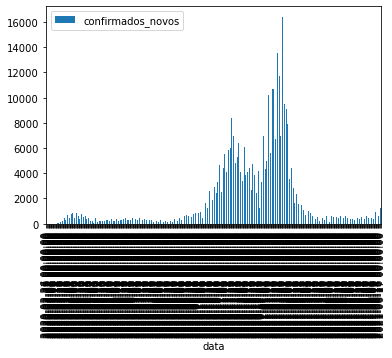

In [109]:
df[["confirmados_novos"]].plot(kind='bar')

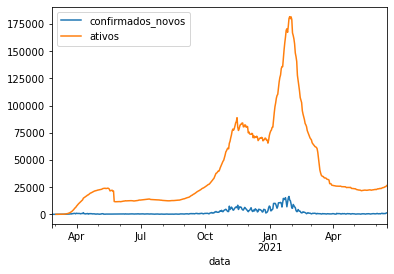

In [21]:
df[["confirmados_novos","ativos"]].plot()

The data has different amplitudes, so, in order to help us just understand the correlation better lets normalize it between [0,1] (just divide every value by the maximum value of that collumn)

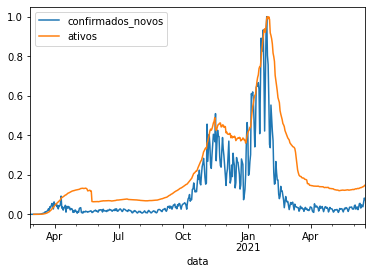

In [22]:
df[["confirmados_novos","ativos"]].apply(lambda x: x/x.max()).plot()

### New syntax alert! 

[.apply](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html) -'Apply a function along an axis of the DataFrame.'

##### What if we just want a subset of the data? How do we select the data?

In [24]:
mask = df.rt_nacional == 1

In [26]:
df.loc[mask]

,data_dados,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,confirmados_estrangeiro,...,obitos_m,confirmados_desconhecidos_m,confirmados_desconhecidos_f,ativos,internados_enfermaria,confirmados_desconhecidos,incidencia_nacional,incidencia_continente,rt_nacional,rt_continente
data,,,,,,,,,,,,,,,,,,,,,
2021-04-19,19-04-2021 00:00,831221,333832,118149,314733,29568,21391,4554,8994,NaN,...,8903.0,NaN,NaN,25059.0,342.0,302.0,71.8,68.1,1.0,1.00
2021-04-20,20-04-2021 00:00,831645,333961,118183,314886,29609,21419,4570,9017,NaN,...,8906.0,NaN,NaN,24576.0,316.0,305.0,71.8,68.1,1.0,1.00
2021-04-28,28-04-2021 00:00,835563,335648,118582,316065,29756,21619,4723,9170,NaN,...,8914.0,NaN,NaN,23809.0,244.0,310.0,69.3,66.5,1.0,1.00
2021-04-29,29-04-2021 00:00,836033,335861,118631,316208,29765,21632,4743,9193,NaN,...,8914.0,NaN,NaN,23733.0,235.0,312.0,69.3,66.5,1.0,1.00
2021-05-17,17-05-2021 00:00,842381,338401,119291,318123,29982,22025,5058,9501,NaN,...,8935.0,NaN,NaN,22181.0,174.0,351.0,50.5,47.5,1.0,0.99
2021-05-18,18-05-2021 00:00,842767,338532,119311,318298,29994,22035,5087,9510,NaN,...,8937.0,NaN,NaN,21997.0,167.0,354.0,50.5,47.5,1.0,0.99


### New syntax alert
[.loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) -'Access a group of rows and columns by label(s) or a boolean array.'


### New syntax alert
[.filter](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.filter.html) -'Subset the dataframe rows or columns according to the specified index labels.'


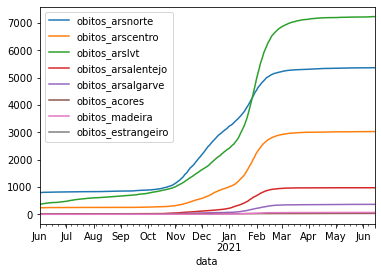

In [28]:
#For future reference. LOC DATA MAGIC
df.loc['June 2020':].filter(regex="obitos_[a-z][a-z]+").plot()



### New syntax alert
[.resample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) -'Resample time-series data.'

1. M - month
2. W - week
3. so on..

### What was the worst month/week of _confirmados_novos_ ? 


In [37]:
df.resample("M")["confirmados_novos"].sum().max()

306838

In [28]:
df.resample("M")["confirmados_novos"].sum().idxmax()

Timestamp('2021-01-31 00:00:00', freq='M')

In [35]:
df.resample("W")["confirmados_novos"].sum().max()

12341.285714285714

In [38]:
df.resample("W")["confirmados_novos"].sum().idxmax()

Timestamp('2021-01-24 00:00:00', freq='W-SUN')

### How did new confirmed cases are compared between regions?

In [78]:
df.filter(regex="confirmados_ars*").diff()

,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve
data,,,,,
2020-02-26,NaN,NaN,NaN,NaN,NaN
2020-02-27,0.0,0.0,0.0,0.0,0.0
2020-02-28,0.0,0.0,0.0,0.0,0.0
2020-02-29,0.0,0.0,0.0,0.0,0.0
2020-03-01,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2021-06-13,117.0,58.0,450.0,16.0,36.0
2021-06-14,124.0,28.0,401.0,10.0,34.0
2021-06-15,147.0,89.0,629.0,32.0,36.0


### New syntax alert
[.diff](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.diff.html) -'Calculates the difference of a Dataframe element compared with another element in the Dataframe (default is element in previous row).'



In [79]:
df.filter(regex="confirmados_ars*").diff().resample("M").mean()

,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve
data,,,,,
2020-02-29,0.000000,0.000000,0.000000,0.000000,0.000000
2020-03-31,143.612903,29.387097,58.032258,1.612903,4.419355
2020-04-30,342.466667,82.600000,133.866667,5.600000,6.466667
2020-05-31,65.612903,11.451613,171.838710,1.322581,1.258065
2020-06-30,25.366667,12.200000,268.433333,7.500000,8.266667
2020-07-31,37.225806,10.612903,221.677419,8.064516,8.548387
2020-08-31,70.451613,11.870968,124.322581,6.774194,7.387097
2020-09-30,205.666667,45.033333,292.366667,18.600000,18.366667
2020-10-31,1170.903226,197.709677,666.161290,39.741935,36.000000


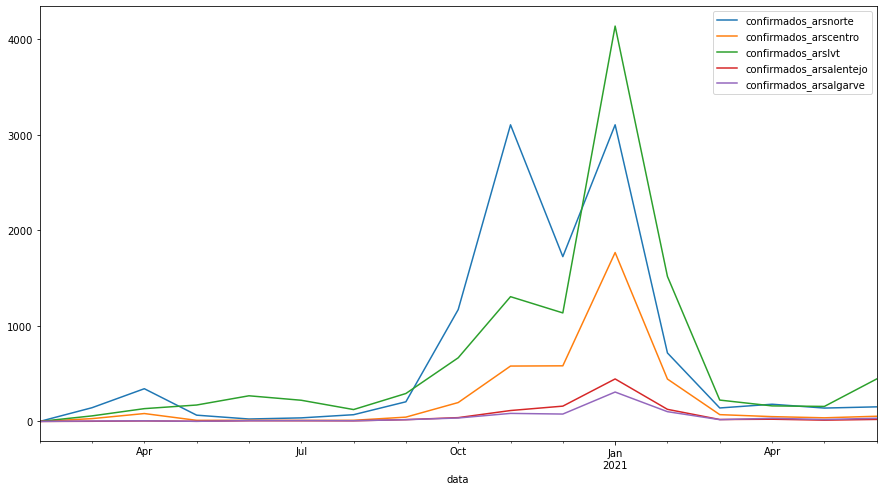

In [80]:
df.filter(regex="confirmados_ars*").diff().resample("M").mean().plot(figsize=(15,8))

### Exercises

1. How many people died when r(t) was higher than 1.05? 
2. Whats the date with the *highest* *new* confirmed cases in *arsnorte*?
3. Plot the pct per day of confirmed cases by region 

## Lets study the impact of vaccines

We already looked at covid data and you already looked at vaccines data. Now we just have to _merge_ them!

In [96]:
#Get vaccines data
vacc_data = 'https://raw.githubusercontent.com/dssg-pt/covid19pt-data/master/vacinas.csv'

df_vac = pd.read_csv(vacc_data,index_col=0,date_parser=date_parser)

In [97]:
df_vac.columns

Index(['doses', 'doses_novas', 'doses1', 'doses1_novas', 'doses2',
       'doses2_novas', 'pessoas_vacinadas_completamente',
       'pessoas_vacinadas_completamente_novas',
       'pessoas_vacinadas_parcialmente',
       'pessoas_vacinadas_parcialmente_novas'],
      dtype='object')

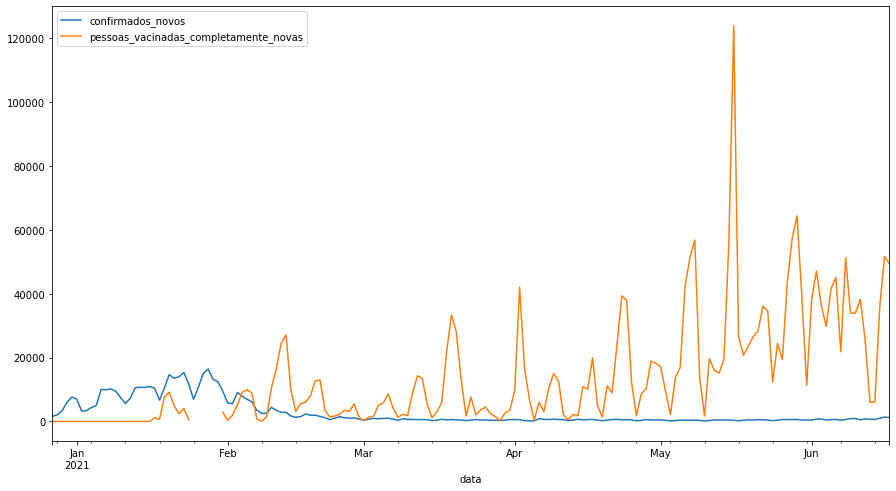

In [98]:
#Normalizar para ver pct
df_vac = df.merge(df_vac,right_index=True,left_index=True)
df_vac[["confirmados_novos","pessoas_vacinadas_completamente_novas"]].plot(figsize=(15,8))

### New syntax alert
[.merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) -'Merge DataFrame or named Series objects with a database-style join.'


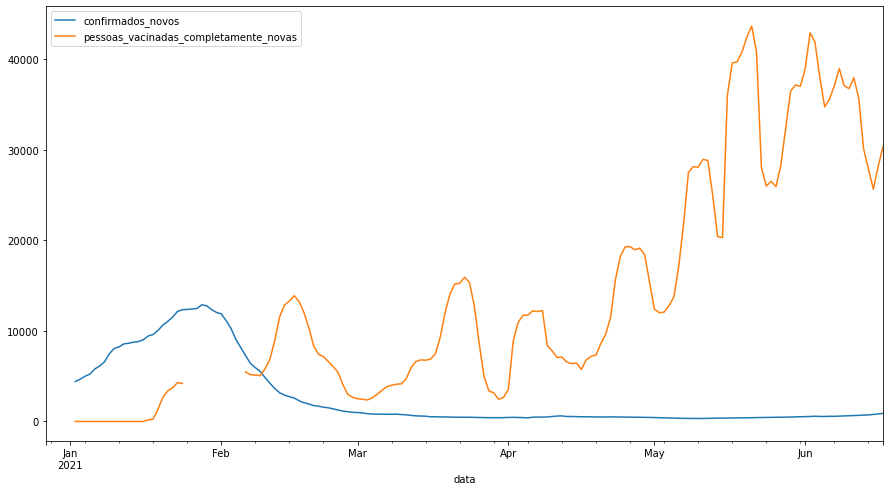

In [107]:
df_vac[["confirmados_novos","pessoas_vacinadas_completamente_novas"]].rolling(7).mean().plot(figsize=(15,8))

### Exercises


1. How does the R(t) correlates with vaccines?
2. Can we correlate the vaccines impact with covid cases? 
3. Lets say that a vaccine after the 2 dose takes 2 weeks to have an impact. How can we measure that?